# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.5 MB/s eta 0:00:00


2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import pandas as pd

In [3]:
try:
    con = mysql.connector.connect(user='user1', password='7oygWy6P', host='3.68.62.36', database='employees')
    print("Connection successful")
except mysql.connector.Error as err:
    print(f"Error: {err}")

Connection successful


3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()

In [5]:
sql = """
SELECT
MAX(hire_date) AS max_hire_date,
MIN(hire_date) AS min_hire_date
FROM employees
"""

In [6]:
cursor.execute(sql)

In [7]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [8]:
cursor_1 = con.cursor()

In [9]:
sql_salary = """
SELECT emp_no, salary, from_date, to_date
FROM salaries s1
WHERE (s1.emp_no, s1.from_date, s1.to_date) = (
    SELECT emp_no, MAX(from_date), MAX(to_date)
    FROM salaries s2
    WHERE s2.emp_no = s1.emp_no
)

"""
cursor_1.execute(sql_salary)

In [10]:
field_names = [i[0] for i in cursor_1.description]

In [11]:
data = cursor_1.fetchall()

In [12]:
res = pd.DataFrame(data, columns=field_names)

In [13]:
print(res.columns.tolist())
print(res.shape)
res.head(3)


['emp_no', 'salary', 'from_date', 'to_date']
(300024, 4)


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [14]:
cursor.close()

True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [15]:
type(res.to_date.loc[0])

datetime.date

In [16]:
import datetime as dt

count_9999 = res[res['to_date'] == dt.date(9999, 1, 1)].shape[0]
count_not_9999 = res[res['to_date'] != dt.date(9999, 1, 1)].shape[0]

print(count_9999)
print(count_not_9999)

240124
59900


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

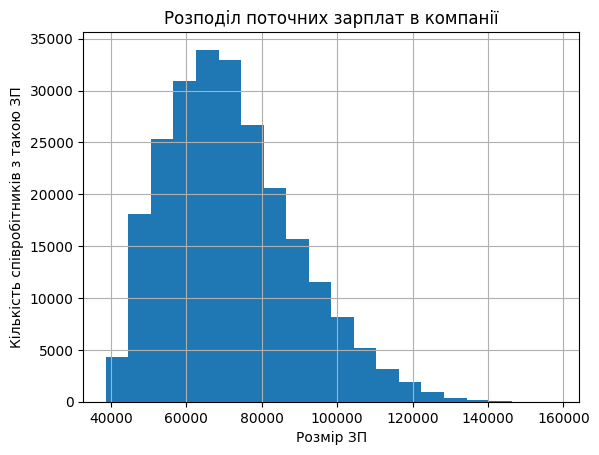

In [17]:
import matplotlib.pyplot as plt

current_employees = res[res['to_date'] == dt.date(9999, 1, 1)]

plt.hist(current_employees.salary, bins=20)

plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')

plt.grid(True)


plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [18]:
con.close()